In [64]:
#Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [67]:
df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [68]:
df.isnull().sum().sum()

76

In [69]:
col = list(df.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

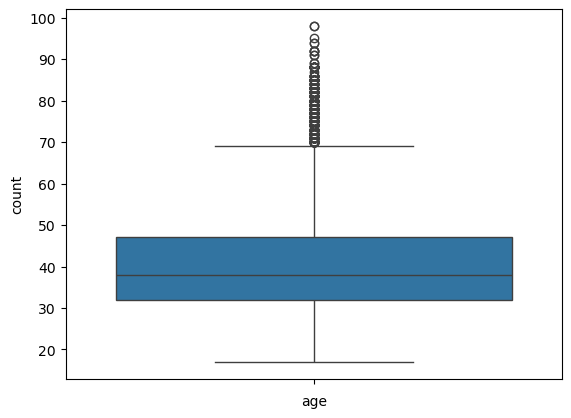

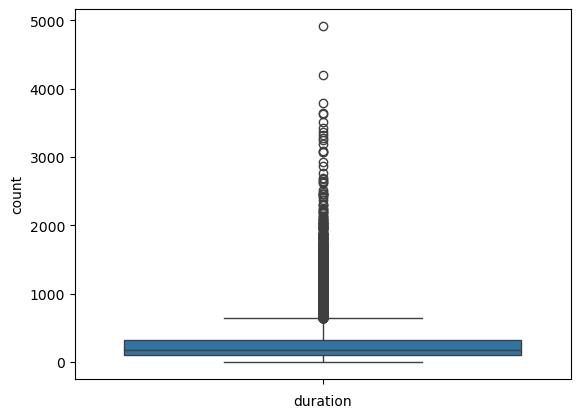

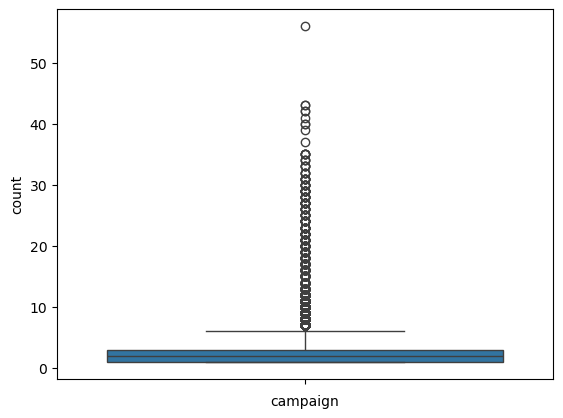

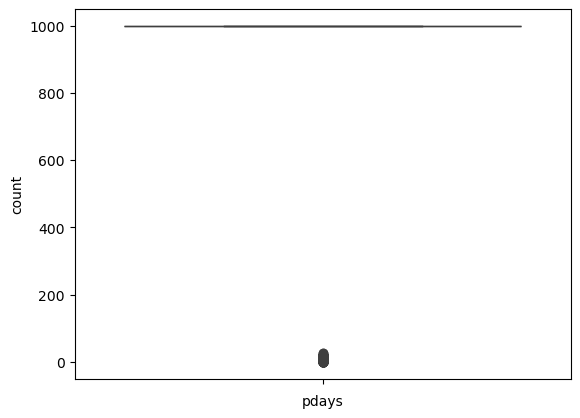

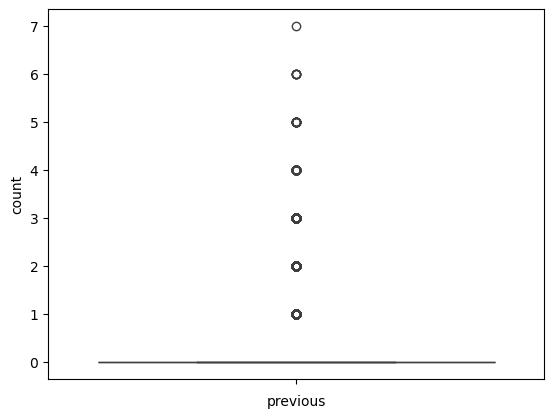

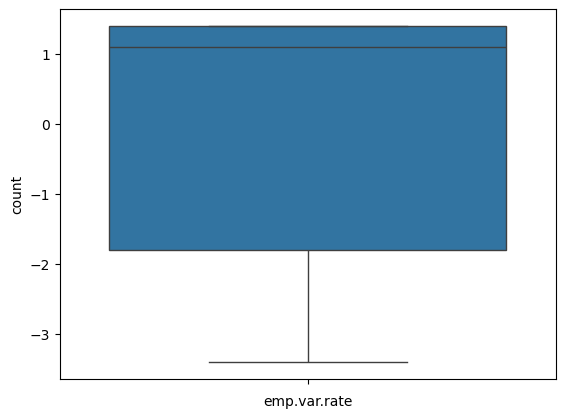

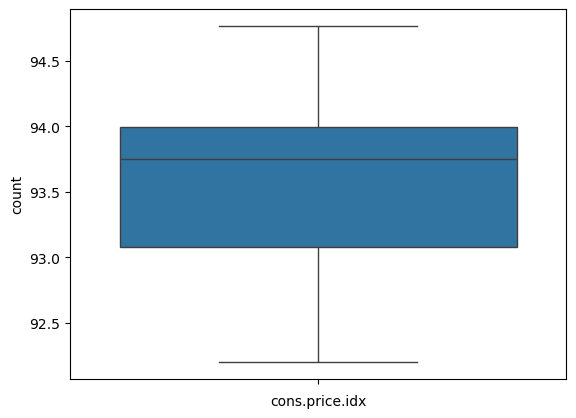

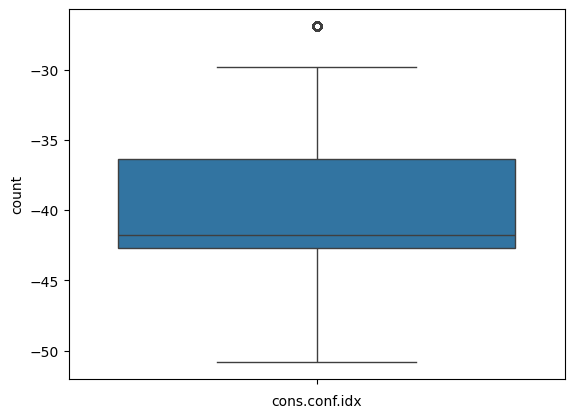

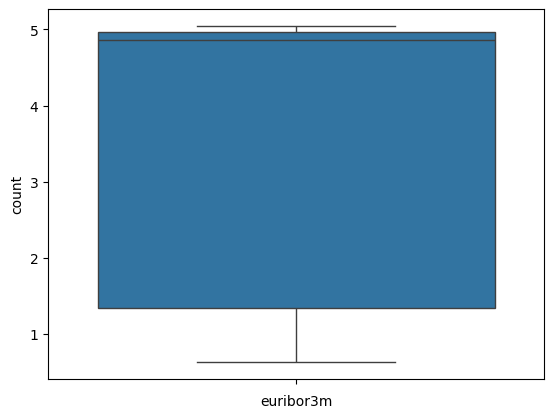

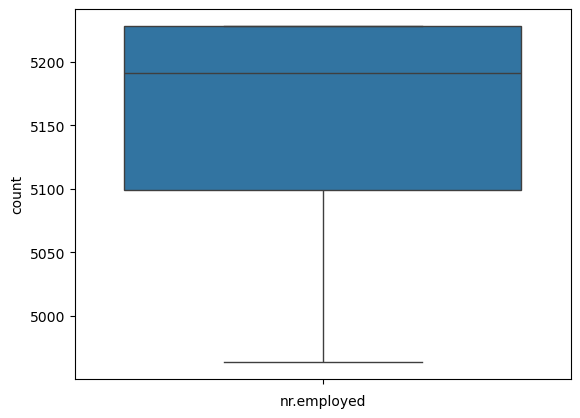

In [70]:
#Box plot
for col_name in col:
    if(df[col_name].dtype != 'object'):
        sns.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [71]:
#Remove outliers
col_names = ['age', 'duration', 'campaign', 'cons.conf.idx' ]
for col in col_names:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    df = df[(df[col]>=LB) &(df[col] <= UB)]

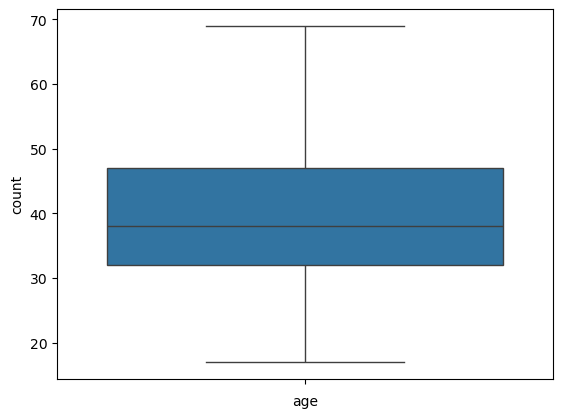

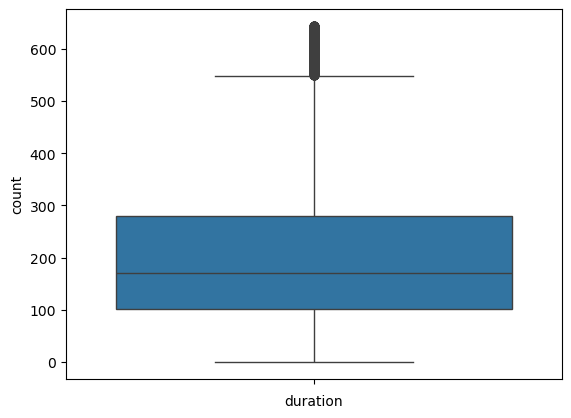

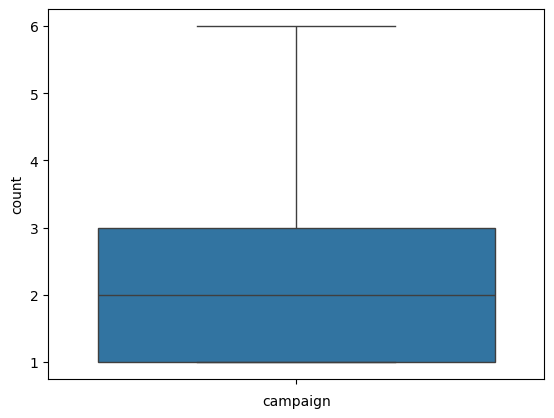

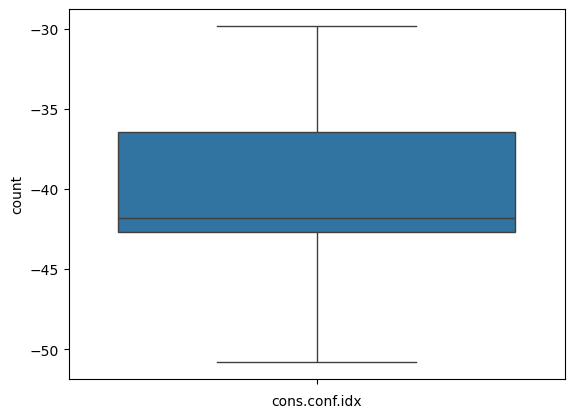

In [72]:
#Box plot
for col_name in col_names:
    if(df[col_name].dtype != 'object'):
        sns.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [73]:
#Label encoding
df['y'] = np.where(df['y']=='yes', 1, 0)

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])



In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35176 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35176 non-null  float64
 1   job             35176 non-null  int32  
 2   marital         35176 non-null  int32  
 3   education       35176 non-null  int32  
 4   default         35176 non-null  int32  
 5   housing         35176 non-null  int32  
 6   loan            35176 non-null  int32  
 7   contact         35176 non-null  int32  
 8   month           35176 non-null  int32  
 9   day_of_week     35176 non-null  int32  
 10  duration        35176 non-null  float64
 11  campaign        35176 non-null  float64
 12  pdays           35176 non-null  float64
 13  previous        35176 non-null  float64
 14  poutcome        35176 non-null  int32  
 15  emp.var.rate    35176 non-null  float64
 16  cons.price.idx  35176 non-null  float64
 17  cons.conf.idx   35176 non-null  floa

#Feature selection
RFE- (Recursive feature elimination)
--> Used to chose the most important features for a predictive model by recursively removing less significant features.

when we using logistic regression, RFE helps to improve model by reducing overfitting and increase interpretability.

How RFE works?

1.   Start with all features in your dataset
2.   Train a logistic regression model using all features
3.   Rank the features based on their importance(eg - absolute value of coeficients
4.   Remove the least important feature
5.   Repeat the process with the reduced set of features
6.   Stop when the desired number of features are reached






Why use RFE with logistic regression?

Logistic regression is sensitive to irrelevant or highly correlated data.
RFE helps to select the most predictive features
It give a cleaner and more interpreter model

In [76]:
#split the data
x = df.iloc[: , :-1] #independent column
y = df['y'] #dependent column

In [77]:
#Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()

rfe = RFE(model)
rfe.fit(x,y)

c:\Users\sahaj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sahaj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression())

In [78]:
column_name = x.columns
important_column_index = [i for i, data in enumerate(rfe.support_) if data == True]
important_column_index

#if data == True --> give important or selected features
#if data == False --> less important columns

[2, 3, 4, 7, 9, 11, 13, 14, 17, 18]

In [79]:
selected_column_name = [column_name[i] for i in important_column_index]
selected_column_name

['marital',
 'education',
 'default',
 'contact',
 'day_of_week',
 'campaign',
 'previous',
 'poutcome',
 'cons.conf.idx',
 'euribor3m']

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [81]:
#build logistic regression model
final_model = LogisticRegression()

#train the model by passing train and test data
final_model.fit(x_train, y_train)

c:\Users\sahaj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
#ask model to predict the output
y_pred = final_model.predict(x_test)

In [83]:
#compare the predicted value with your actual value

#actual value
y_test

3871     0
32207    0
2318     0
13440    0
39109    0
        ..
20638    1
24127    0
30155    0
37776    0
33208    0
Name: y, Length: 7036, dtype: int32

In [84]:
#predicted_values
y_pred

array([0, 0, 0, ..., 0, 0, 0])

##Model Evaluation metrices in Logistic Regression
1. **Accuracy** -- How many predictions the model got correct out of all predictions made.

Formula - Accuracy - (TP + TN)/(total_predictions)

When to use ? -> when we have balanced dataset -- (have almost equal no of records)

2. **Confusion Matrix** - it is 2x2 table that tells what the model predicted correctly and incorrectly

Meanings -

TP(true positive) -- Model said - "Yes" and it was Yes

TN(true negative) -- Model said - "No" and it was No

FP(false positive) -- Model said - "Yes" and it was No

FN(false negative) -- Model said - "No" and it as Yes

**3. Precision** - out of all Yes predicted, how many are correct.

ex - model predicted -> 10 yes

but out of them 7 are actually yes

precision = 7/10 = 0.7

Formula -> True positive /(True positive + false positive)

if > 0.80 - very good
0.60 to 0.80 - decent precision

**4. Recall**  - out of actually yes how many did model catch?

ex - actual yes - 10

model caught only - 6

recall = 6/10

Formula - True Positive/(True positive + False Negative)

**5. F1 Score** - balance between precision and recall or it is a harmonic mean of precision and recall

-> if both precision and recall are good -> f1 is good

-> if one of them is bad -> f1 score is low

In [85]:
from sklearn.metrics import accuracy_score
print('Accuracy is - ', accuracy_score(y_pred, y_test) * 100)

Accuracy is -  93.90278567367822


In [86]:
from sklearn.metrics import precision_score
print('Precision score - ', precision_score(y_pred, y_test) * 100)

Precision score -  37.30769230769231


In [87]:
from sklearn.metrics import recall_score
print('Recall score - ', recall_score(y_pred, y_test) * 100)

Recall score -  65.31986531986533


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6413,  103],
       [ 326,  194]], dtype=int64)

In [89]:
from sklearn.metrics import f1_score
print('F1 score - ', f1_score(y_pred, y_test) * 100)

F1 score -  47.49082007343941
